<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    69.137708  26.485122  78.832640  0.489871  184.945341   
      1.0    38.899064  87.519010  92.428646  0.143323  228.990043   
      2.0    71.898363  35.237110  87.955612  0.686693  205.777778   
      3.0    21.170754  68.011510  78.631041 -0.651855  177.161450   
      4.0    73.936028  73.521153  36.654996  0.630182  194.742359   
...                ...        ...        ...       ...         ...   
999.0 15.0   92.299263  77.651369  28.694183 -0.122516  208.522299   
      16.0   68.479449  56.577785  43.210667 -0.081600  178.186301   
      17.0   95.433643  39.314322  67.776419 -0.360751  212.163633   
      18.0   80.053327  71.354347  97.596260  0.367564  259.371497   
      19.0   26.125557  60.559947  51.369731 -0.052948  148.002288   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.320269  0.625072  
      1.0    228.719005  0.271038  
      2.0    204.996608  0.781170  
      3.0    177.530012 -0.368562  
      4.0    194.140350  0.602009  
...                 ...       ...  
999.0 15.0   208.484120  0.038179  
      16.0   178.078654  0.107647  
      17.0   212.123840  0.039794  
      18.0   258.826196  0.545302  
      19.0   148.050359 -0.048072  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    69.137708  26.485122  78.832640  0.489871  184.945341   
      1.0    38.899064  87.519010  92.428646  0.143323  228.990043   
      2.0    71.898363  35.237110  87.955612  0.686693  205.777778   
      3.0    21.170754  68.011510  78.631041 -0.651855  177.161450   
      4.0    73.936028  73.521153  36.654996  0.630182  194.742359   
...                ...        ...        ...       ...         ...   
999.0 15.0   92.299263  77.651369  28.694183 -0.122516  208.522299   
      16.0   68.479449  56.577785  43.210667 -0.081600  178.186301   
      17.0   95.433643  39.314322  67.776419 -0.360751  212.163633   
      18.0   80.053327  71.354347  97.596260  0.367564  259.371497   
      19.0   26.125557  60.559947  51.369731 -0.052948  148.002288   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.320269  0.625072  
      1.0    228.719005  0.271038  
      2.0    204.996608  0.781170  
      3.0    177.530012 -0.368562  
      4.0    194.140350  0.602009  
...                 ...       ...  
999.0 15.0   208.484120  0.038179  
      16.0   178.078654  0.107647  
      17.0   212.123840  0.039794  
      18.0   258.826196  0.545302  
      19.0   148.050359 -0.048072  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,69.137708,26.485122,78.832640,0.489871,184.945341,184.320269,0.625072
1,0.0,1.0,38.899064,87.519010,92.428646,0.143323,228.990043,228.719005,0.271038
2,0.0,2.0,71.898363,35.237110,87.955612,0.686693,205.777778,204.996608,0.781170
3,0.0,3.0,21.170754,68.011510,78.631041,-0.651855,177.161450,177.530012,-0.368562
4,0.0,4.0,73.936028,73.521153,36.654996,0.630182,194.742359,194.140350,0.602009
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,92.299263,77.651369,28.694183,-0.122516,208.522299,208.484120,0.038179
19996,999.0,16.0,68.479449,56.577785,43.210667,-0.081600,178.186301,178.078654,0.107647
19997,999.0,17.0,95.433643,39.314322,67.776419,-0.360751,212.163633,212.123840,0.039794
19998,999.0,18.0,80.053327,71.354347,97.596260,0.367564,259.371497,258.826196,0.545302


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    69.137708  26.485122  78.832640  0.489871  184.945341   
      1.0    38.899064  87.519010  92.428646  0.143323  228.990043   
      2.0    71.898363  35.237110  87.955612  0.686693  205.777778   
      3.0    21.170754  68.011510  78.631041 -0.651855  177.161450   
      4.0    73.936028  73.521153  36.654996  0.630182  194.742359   
...                ...        ...        ...       ...         ...   
999.0 15.0   92.299263  77.651369  28.694183 -0.122516  208.522299   
      16.0   68.479449  56.577785  43.210667 -0.081600  178.186301   
      17.0   95.433643  39.314322  67.776419 -0.360751  212.163633   
      18.0   80.053327  71.354347  97.596260  0.367564  259.371497   
      19.0   26.125557  60.559947  51.369731 -0.052948  148.002288   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    184.320269  0.625072  
      1.0    228.719005  0.271038  
      2.0    204.996608  0.781170  
      3.0    177.530012 -0.368562  
      4.0    194.140350  0.602009  
...                 ...       ...  
999.0 15.0   208.484120  0.038179  
      16.0   178.078654  0.107647  
      17.0   212.123840  0.039794  
      18.0   258.826196  0.545302  
      19.0   148.050359 -0.048072  

[20000 rows x 7 columns]

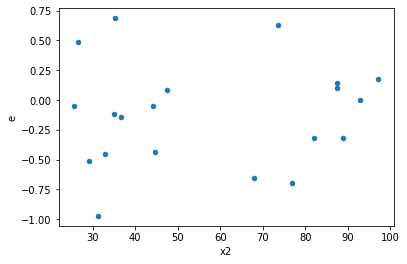

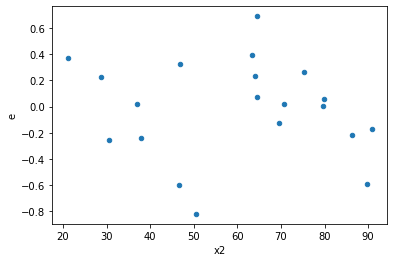

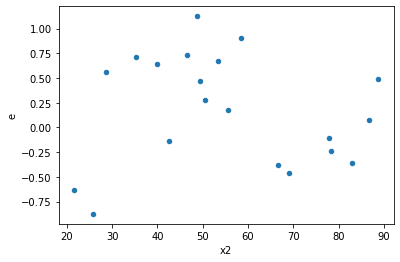

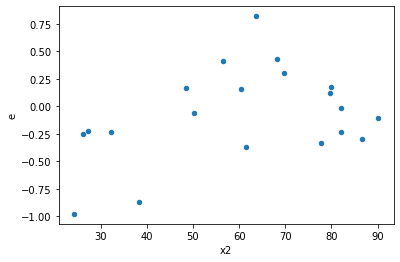

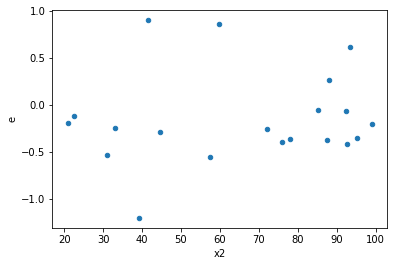

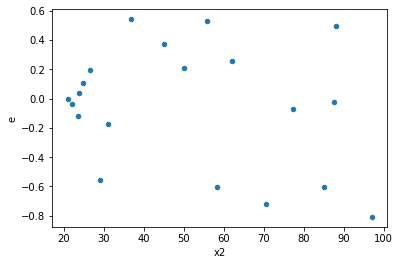

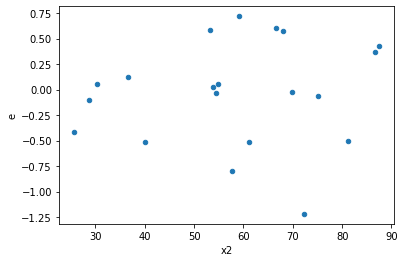

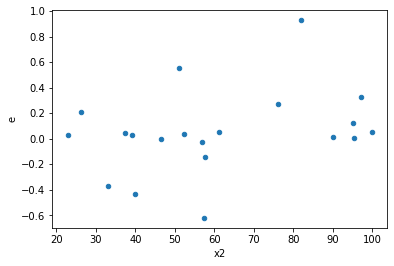

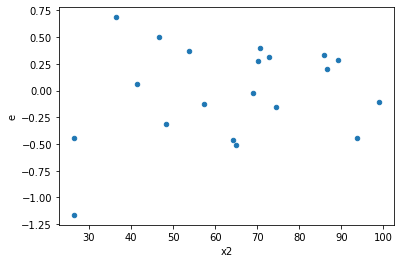

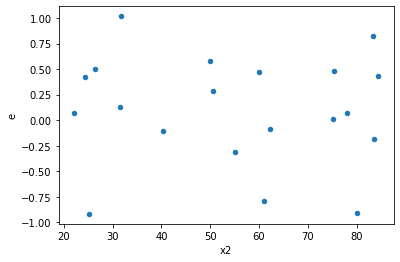

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,5.0,0.5735280046229413,1.009666858445823,0.11470560092458826,0.20193337168916461,1.760449098051656,0.5498719732662527,0.7250640133668736,0.27493598663312635,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,1.0874365286305723,1.8069193324796342,0.21748730572611447,0.36138386649592685,1.6616319986557,0.5909118863660008,0.7045440568169996,0.2954559431830004,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.40257918625847705,0.6200154551103882,0.08051583725169541,0.12400309102207765,1.5401080738245263,0.6471294517081807,0.6764352741459096,0.32356472585409035,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,0.5087985302805643,0.7436126213349422,0.10175970605611287,0.14872252426698845,1.4615070152126728,0.6872724740276515,0.6563637629861743,0.34363623701382573,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.24477093050596002,1.9515294356377222,0.048954186101192,0.39030588712754444,7.972880732216703,0.03978949737951565,0.9801052513102422,0.019894748689757824,Reject001=1 : Homoscedasticity
9.0,5.0,5.0,0.9807547399950728,2.3037159267201783,0.19615094799901456,0.4607431853440357,2.348921532341258,0.3702910750191495,0.8148544624904253,0.18514553750957474,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,0.5956294986440661,0.9202073336775175,0.11912589972881323,0.1840414667355035,1.5449324383233936,0.6447666154148219,0.677616692292589,0.32238330770741097,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,0.6029005084863525,0.787370202478544,0.12058010169727049,0.1574740404957088,1.3059703738769814,0.7767225937961579,0.611638703101921,0.38836129689807897,Reject001=1 : Homoscedasticity
15.0,5.0,5.0,0.338175233095687,0.8186707628648253,0.0676350466191374,0.16373415257296506,2.4208477816977854,0.354094564204396,0.822952717897802,0.177047282102198,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.5735280046229413,1.009666858445823,0.11470560092458826,0.20193337168916461,1.760449098051656,0.5498719732662527,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.565957626071322,0.06886571103449254,0.11319152521426441,0.013773142206898509,0.12167997719640954,0.03732206104110677,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,1.0874365286305723,1.8069193324796342,0.21748730572611447,0.36138386649592685,1.6616319986557,0.5909118863660008,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,1.092572172480788,0.2718933314785979,0.2185144344961576,0.05437866629571958,0.2488561747470087,0.15310612088909475,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,0.40257918625847705,0.6200154551103882,0.08051583725169541,0.12400309102207765,1.5401080738245263,0.6471294517081807,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,0.5087985302805643,0.7436126213349422,0.10175970605611287,0.14872252426698845,1.4615070152126728,0.6872724740276515,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,0.24477093050596002,1.9515294356377222,0.048954186101192,0.39030588712754444,7.972880732216703,0.03978949737951565,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.2551272779982881,0.18657067244319397,0.05102545559965762,0.037314134488638795,0.7312846901633383,0.7396671366995418,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,2.481875938788957,0.3301353456493506,0.4963751877577914,0.06602706912987012,0.1330184722329198,0.04500709531775326,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      974
Reject001=0 : Heteroscedasticity     26
Name: Result_test, dtype: int64